In [1]:
# imports necesarios para el análisis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import sys
import os

# agregar el directorio src al path para importar nuestros módulos
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))

# imports de nuestros módulos
from sim_core import Simulacion, ejecutar_multiples_simulaciones, estimar_probabilidad_5_aviones_en_1_hora
from plane import Plane
import const as c
import utilidades as u

# configuración de matplotlib para gráficos profesionales
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 16

# configurar pandas para mostrar más decimales
pd.set_option('display.precision', 4)
pd.set_option('display.max_columns', None)

print("✅ imports y configuración completados")

✅ imports y configuración completados


In [2]:
# configuración de parámetros para las simulaciones
np.random.seed(42)  # para reproducibilidad

# parámetros de simulación
DIAS_SIMULACION = 5  # días para estadísticas robustas
NUM_SIMULACIONES = 10  # número de simulaciones para promedios
LAMBDA_VALORES = [0.02, 0.1, 0.2, 0.5, 1.0]  # valores de lambda a analizar

print("✅ parámetros de simulación configurados")
print(f"días por simulación: {DIAS_SIMULACION}")
print(f"número de simulaciones: {NUM_SIMULACIONES}")
print(f"valores de lambda: {LAMBDA_VALORES}")


✅ parámetros de simulación configurados
días por simulación: 5
número de simulaciones: 10
valores de lambda: [0.02, 0.1, 0.2, 0.5, 1.0]


In [3]:

# pregunta 2: calcular lambda para 1 avión por hora
print("=" * 60)
print("pregunta 2: cálculo de lambda para 1 avión por hora")
print("=" * 60)

# si el promedio de arribos es de 1 avión por hora, entonces:
# en 60 minutos esperamos 1 avión
# por lo tanto: lambda * 60 = 1
# entonces: lambda = 1/60

lambda_1_por_hora = 1.0 / 60.0
print(f"lambda para 1 avión por hora: {lambda_1_por_hora:.6f}")
print(f"esto significa que en cada minuto hay una probabilidad de {lambda_1_por_hora:.4f} de que aparezca un avión")

# verificación: en una hora (60 minutos) esperamos lambda * 60 = 1 avión
aviones_esperados_por_hora = lambda_1_por_hora * 60
print(f"verificación: aviones esperados por hora = {aviones_esperados_por_hora:.1f}")

# guardamos este valor para usar en las siguientes preguntas
LAMBDA_1_POR_HORA = lambda_1_por_hora

pregunta 2: cálculo de lambda para 1 avión por hora
lambda para 1 avión por hora: 0.016667
esto significa que en cada minuto hay una probabilidad de 0.0167 de que aparezca un avión
verificación: aviones esperados por hora = 1.0


pregunta 3: probabilidad de 5 aviones en 1 hora
estimando probabilidad de 5 aviones en 1 hora con lambda=0.016666666666666666
probabilidad simulada de 5 aviones en 1 hora: 0.003000
probabilidad teórica (poisson): 0.003066
error relativo: 0.0214


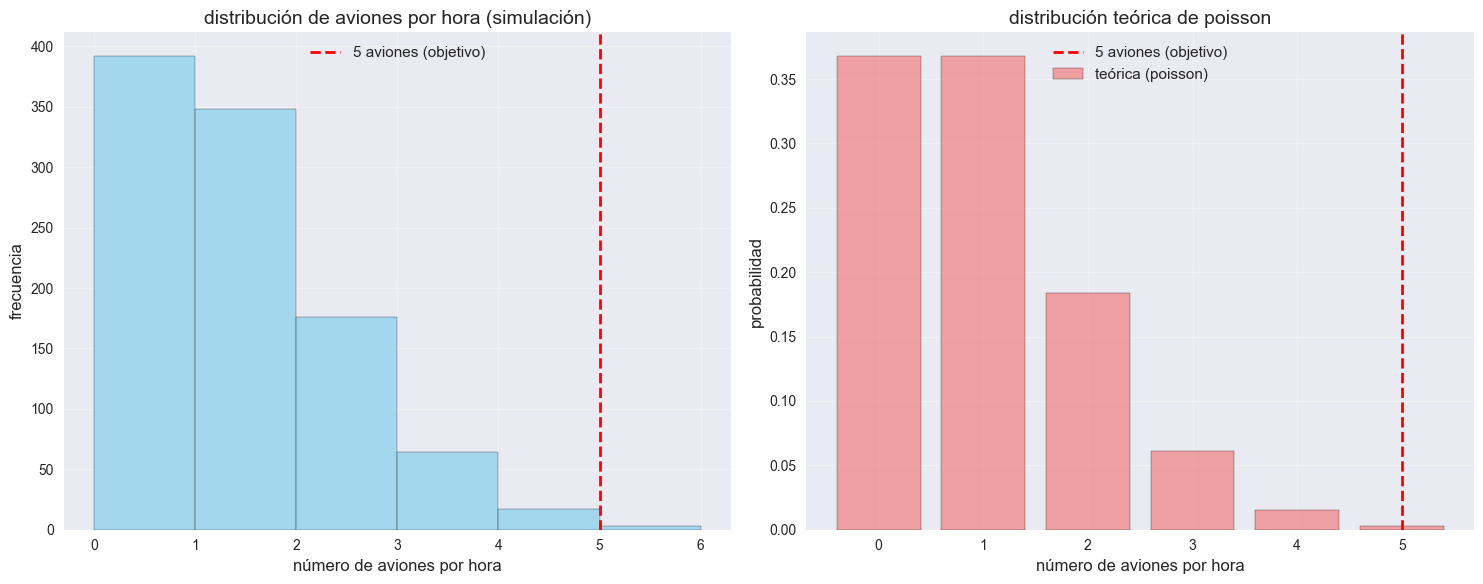


análisis adicional:
tasa de llegadas por hora: 1.00
probabilidad de 0 aviones: 0.3679
probabilidad de 1 avión: 0.3679
probabilidad de 2 aviones: 0.1839
probabilidad de 3 aviones: 0.0613
probabilidad de 4 aviones: 0.0153
probabilidad de 5 aviones: 0.0031
probabilidad de 6+ aviones: 0.0006


In [4]:
# pregunta 3: estimar probabilidad de 5 aviones en 1 hora
from sim_core import estimar_probabilidad_5_aviones_en_1_hora


print("=" * 60)
print("pregunta 3: probabilidad de 5 aviones en 1 hora")
print("=" * 60)

# usar la función que ya está implementada en sim_core.py
resultado_prob = estimar_probabilidad_5_aviones_en_1_hora(LAMBDA_1_POR_HORA, 1000)

print(f"probabilidad simulada de 5 aviones en 1 hora: {resultado_prob['probabilidad_simulada']:.6f}")
print(f"probabilidad teórica (poisson): {resultado_prob['probabilidad_teorica']:.6f}")
print(f"error relativo: {resultado_prob['error_relativo']:.4f}")

# crear gráfico de distribución de aviones por hora
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# histograma de conteos por hora
conteos = resultado_prob['conteos_por_hora']
ax1.hist(conteos, bins=range(max(conteos)+2), alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(x=5, color='red', linestyle='--', linewidth=2, label='5 aviones (objetivo)')
ax1.set_xlabel('número de aviones por hora')
ax1.set_ylabel('frecuencia')
ax1.set_title('distribución de aviones por hora (simulación)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# comparación con distribución teórica de poisson
lambda_60 = LAMBDA_1_POR_HORA * 60  # tasa por hora
x_teorico = np.arange(0, max(conteos)+1)
prob_teorica = stats.poisson.pmf(x_teorico, lambda_60)

ax2.bar(x_teorico, prob_teorica, alpha=0.7, color='lightcoral', edgecolor='black', label='teórica (poisson)')
ax2.axvline(x=5, color='red', linestyle='--', linewidth=2, label='5 aviones (objetivo)')
ax2.set_xlabel('número de aviones por hora')
ax2.set_ylabel('probabilidad')
ax2.set_title('distribución teórica de poisson')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# análisis adicional
print(f"\nanálisis adicional:")
print(f"tasa de llegadas por hora: {lambda_60:.2f}")
print(f"probabilidad de 0 aviones: {stats.poisson.pmf(0, lambda_60):.4f}")
print(f"probabilidad de 1 avión: {stats.poisson.pmf(1, lambda_60):.4f}")
print(f"probabilidad de 2 aviones: {stats.poisson.pmf(2, lambda_60):.4f}")
print(f"probabilidad de 3 aviones: {stats.poisson.pmf(3, lambda_60):.4f}")
print(f"probabilidad de 4 aviones: {stats.poisson.pmf(4, lambda_60):.4f}")
print(f"probabilidad de 5 aviones: {stats.poisson.pmf(5, lambda_60):.4f}")
print(f"probabilidad de 6+ aviones: {1 - stats.poisson.cdf(5, lambda_60):.4f}")


In [5]:
# pregunta 4: simular con diferentes lambdas y analizar congestión
print("=" * 60)
print("pregunta 4: análisis de congestión vs lambda")
print("=" * 60)

# ejecutar simulaciones para cada valor de lambda
resultados_lambda = {}

print("ejecutando simulaciones para diferentes valores de lambda...")
for i, lam in enumerate(LAMBDA_VALORES):
    print(f"simulando lambda = {lam} ({i+1}/{len(LAMBDA_VALORES)})...")
    
    # ejecutar múltiples simulaciones sin viento ni tormenta
    stats = ejecutar_multiples_simulaciones(
        lambda_param=lam,
        dias_simulacion=DIAS_SIMULACION,
        num_simulaciones=NUM_SIMULACIONES,
        viento_activo=False,
        storm_activa=False
    )
    
    resultados_lambda[lam] = stats

print("✅ simulaciones completadas")

# crear dataframe con los resultados para análisis
data = []
for lam, stats in resultados_lambda.items():
    data.append({
        'lambda': lam,
        'total_aviones': stats['total_aviones']['promedio'],
        'total_aviones_error': stats['total_aviones']['error_estandar'],
        'aterrizados': stats['aterrizados']['promedio'],
        'aterrizados_error': stats['aterrizados']['error_estandar'],
        'desviados': stats['desviados']['promedio'],
        'desviados_error': stats['desviados']['error_estandar'],
        'tiempo_promedio': stats['tiempo_promedio_aterrizaje']['promedio'],
        'tiempo_promedio_error': stats['tiempo_promedio_aterrizaje']['error_estandar'],
        'desvios_montevideo': stats['desvios_a_montevideo']['promedio'],
        'desvios_montevideo_error': stats['desvios_a_montevideo']['error_estandar']
    })

df_resultados = pd.DataFrame(data)

# calcular métricas adicionales
df_resultados['tasa_aterrizaje'] = df_resultados['aterrizados'] / df_resultados['total_aviones'] * 100
df_resultados['tasa_desvio'] = df_resultados['desviados'] / df_resultados['total_aviones'] * 100
df_resultados['tasa_desvio_montevideo'] = df_resultados['desvios_montevideo'] / df_resultados['total_aviones'] * 100

print("\nresultados resumidos:")
print(df_resultados[['lambda', 'total_aviones', 'aterrizados', 'desviados', 'tasa_aterrizaje', 'tasa_desvio', 'tiempo_promedio']].round(2))


pregunta 4: análisis de congestión vs lambda
ejecutando simulaciones para diferentes valores de lambda...
simulando lambda = 0.02 (1/5)...
ejecutando 10 simulaciones con lambda=0.02
simulacion 1/10
iniciando simulacion con lambda=0.02
dias a simular: 5
dia 1 completado, aviones activos: 0
dia 2 completado, aviones activos: 0
dia 3 completado, aviones activos: 1
dia 4 completado, aviones activos: 1
dia 5 completado, aviones activos: 0
simulacion completada!
simulacion 2/10
iniciando simulacion con lambda=0.02
dias a simular: 5
dia 1 completado, aviones activos: 0
dia 2 completado, aviones activos: 2
dia 3 completado, aviones activos: 0
dia 4 completado, aviones activos: 0
dia 5 completado, aviones activos: 0
simulacion completada!
simulacion 3/10
iniciando simulacion con lambda=0.02
dias a simular: 5
dia 1 completado, aviones activos: 0
dia 2 completado, aviones activos: 1
dia 3 completado, aviones activos: 2
dia 4 completado, aviones activos: 0
dia 5 completado, aviones activos: 0
simu

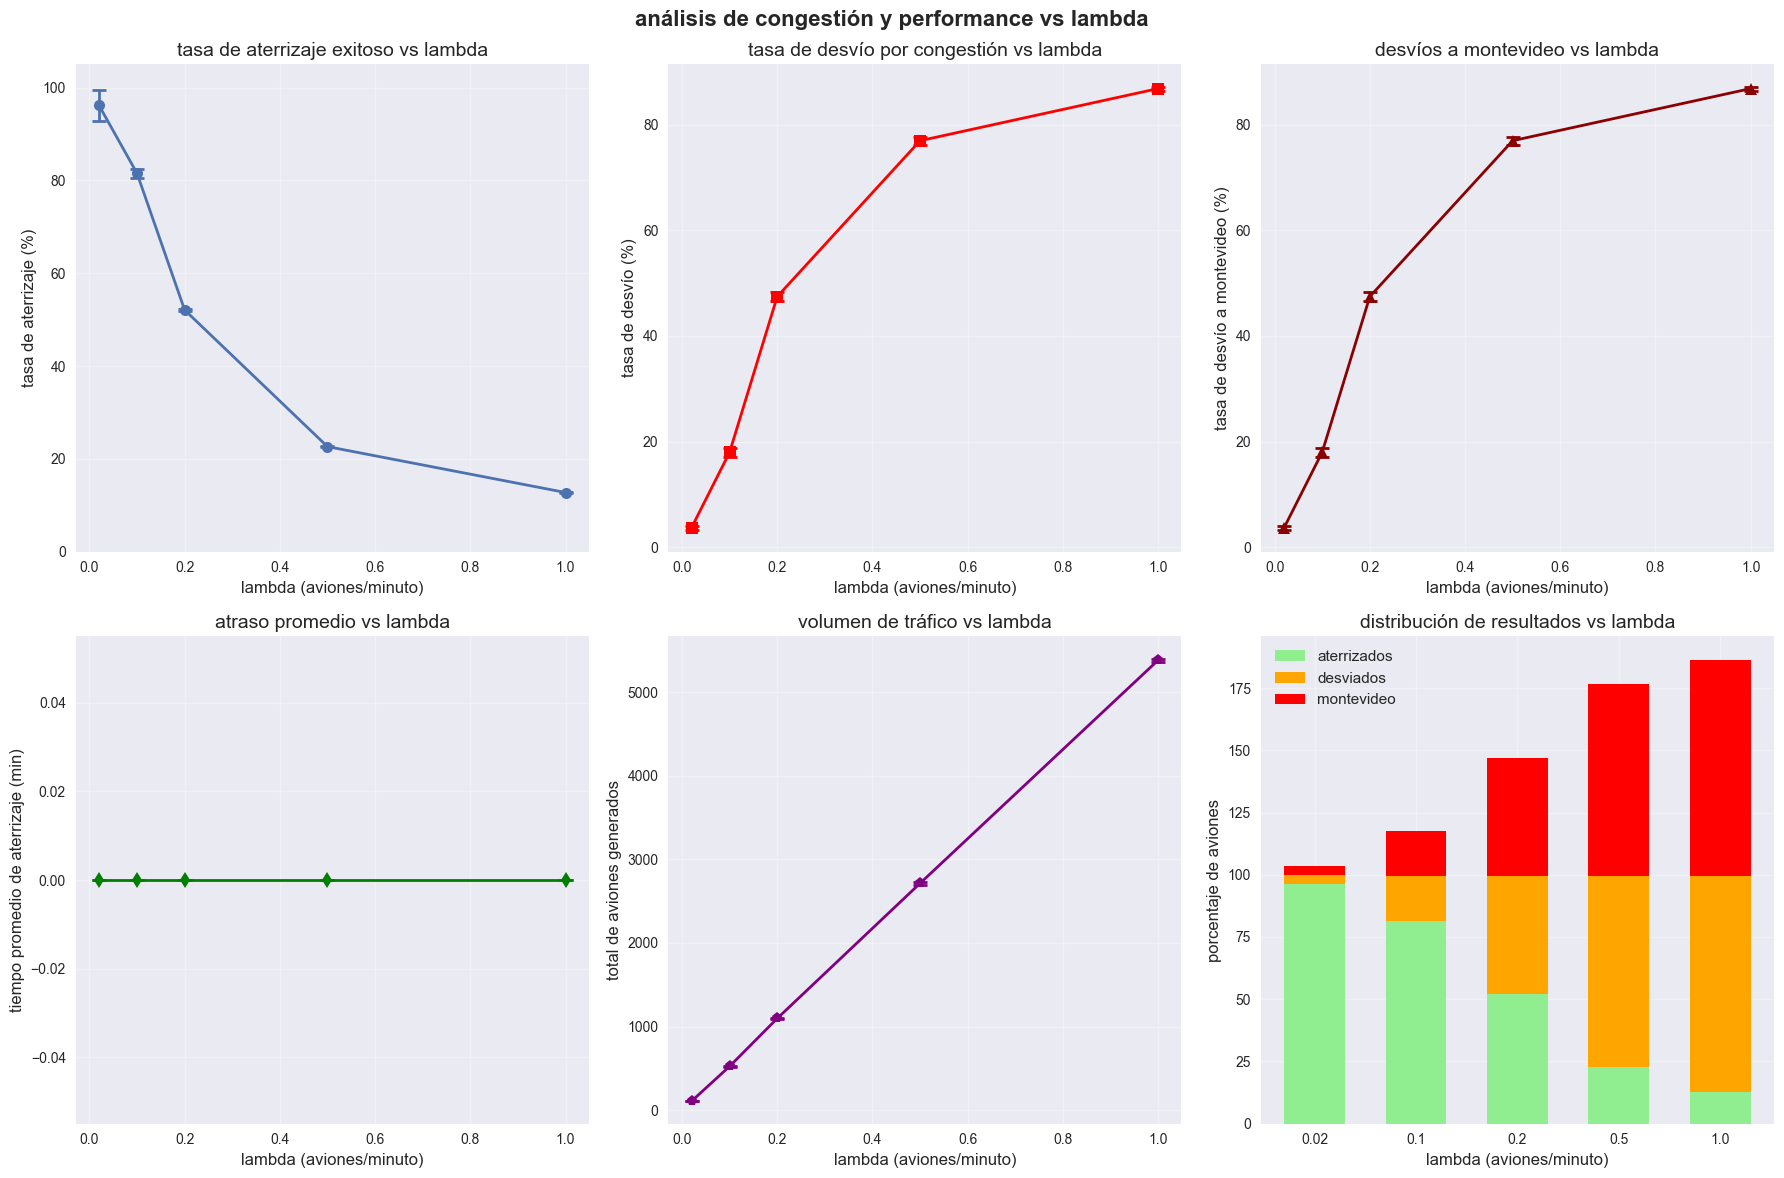


análisis de correlaciones:
correlación lambda vs tasa de desvío: 0.901
correlación lambda vs tiempo promedio: nan
correlación lambda vs desvíos a montevideo: 0.901

punto de inflexión (desvíos > 5%): lambda = 0.10


/Users/nicogalindez/UTDT/ACN/TP1-ACN/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/nicogalindez/UTDT/ACN/TP1-ACN/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [14]:
# gráficos para análisis de congestión vs lambda
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('análisis de congestión y performance vs lambda', fontsize=16, fontweight='bold')

# 1. tasa de aterrizaje vs lambda
ax1 = axes[0, 0]
ax1.errorbar(df_resultados['lambda'], df_resultados['tasa_aterrizaje'], 
             yerr=df_resultados['aterrizados_error']/df_resultados['total_aviones']*100,
             marker='o', capsize=5, capthick=2, linewidth=2, markersize=8)
ax1.set_xlabel('lambda (aviones/minuto)')
ax1.set_ylabel('tasa de aterrizaje (%)')
ax1.set_title('tasa de aterrizaje exitoso vs lambda')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 105)

# 2. tasa de desvío vs lambda
ax2 = axes[0, 1]
ax2.errorbar(df_resultados['lambda'], df_resultados['tasa_desvio'], 
             yerr=df_resultados['desviados_error']/df_resultados['total_aviones']*100,
             marker='s', capsize=5, capthick=2, linewidth=2, markersize=8, color='red')
ax2.set_xlabel('lambda (aviones/minuto)')
ax2.set_ylabel('tasa de desvío (%)')
ax2.set_title('tasa de desvío por congestión vs lambda')
ax2.grid(True, alpha=0.3)

# 3. desvíos a montevideo vs lambda
ax3 = axes[0, 2]
ax3.errorbar(df_resultados['lambda'], df_resultados['tasa_desvio_montevideo'], 
             yerr=df_resultados['desvios_montevideo_error']/df_resultados['total_aviones']*100,
             marker='^', capsize=5, capthick=2, linewidth=2, markersize=8, color='darkred')
ax3.set_xlabel('lambda (aviones/minuto)')
ax3.set_ylabel('tasa de desvío a montevideo (%)')
ax3.set_title('desvíos a montevideo vs lambda')
ax3.grid(True, alpha=0.3)

# 4. tiempo promedio de aterrizaje vs lambda
ax4 = axes[1, 0]
ax4.errorbar(df_resultados['lambda'], df_resultados['tiempo_promedio'], 
             yerr=df_resultados['tiempo_promedio_error'],
             marker='d', capsize=5, capthick=2, linewidth=2, markersize=8, color='green')
ax4.set_xlabel('lambda (aviones/minuto)')
ax4.set_ylabel('tiempo promedio de aterrizaje (min)')
ax4.set_title('atraso promedio vs lambda')
ax4.grid(True, alpha=0.3)

# 5. total de aviones generados vs lambda
ax5 = axes[1, 1]
ax5.errorbar(df_resultados['lambda'], df_resultados['total_aviones'], 
             yerr=df_resultados['total_aviones_error'],
             marker='p', capsize=5, capthick=2, linewidth=2, markersize=8, color='purple')
ax5.set_xlabel('lambda (aviones/minuto)')
ax5.set_ylabel('total de aviones generados')
ax5.set_title('volumen de tráfico vs lambda')
ax5.grid(True, alpha=0.3)

# 6. comparación de tasas (stacked bar)
ax6 = axes[1, 2]
width = 0.6
x_pos = np.arange(len(df_resultados))
ax6.bar(x_pos, df_resultados['tasa_aterrizaje'], width, label='aterrizados', color='lightgreen')
ax6.bar(x_pos, df_resultados['tasa_desvio'], width, 
        bottom=df_resultados['tasa_aterrizaje'], label='desviados', color='orange')
ax6.bar(x_pos, df_resultados['tasa_desvio_montevideo'], width,
        bottom=df_resultados['tasa_aterrizaje'] + df_resultados['tasa_desvio'], 
        label='montevideo', color='red')
ax6.set_xlabel('lambda (aviones/minuto)')
ax6.set_ylabel('porcentaje de aviones')
ax6.set_title('distribución de resultados vs lambda')
ax6.set_xticks(x_pos)
ax6.set_xticklabels(df_resultados['lambda'])
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# análisis de correlaciones
print("\n" + "="*60)
print("análisis de correlaciones:")
print("="*60)

# calcular correlación entre lambda y tasa de desvío
corr_desvio = np.corrcoef(df_resultados['lambda'], df_resultados['tasa_desvio'])[0, 1]
corr_tiempo = np.corrcoef(df_resultados['lambda'], df_resultados['tiempo_promedio'])[0, 1]
corr_montevideo = np.corrcoef(df_resultados['lambda'], df_resultados['tasa_desvio_montevideo'])[0, 1]

print(f"correlación lambda vs tasa de desvío: {corr_desvio:.3f}")
print(f"correlación lambda vs tiempo promedio: {corr_tiempo:.3f}")
print(f"correlación lambda vs desvíos a montevideo: {corr_montevideo:.3f}")

# identificar punto de inflexión (donde empieza a haber desvíos significativos)
umbral_desvio = 5  # 5% de desvíos
punto_inflexion = df_resultados[df_resultados['tasa_desvio'] > umbral_desvio]['lambda'].min()
print(f"\npunto de inflexión (desvíos > {umbral_desvio}%): lambda = {punto_inflexion:.2f}")


In [15]:
# pregunta 5: efectos del viento en las estadísticas
print("=" * 60)
print("pregunta 5: análisis de efectos del viento")
print("=" * 60)

# ejecutar simulaciones con viento activo (p_goaround = 0.1)
resultados_viento = {}

print("ejecutando simulaciones con viento activo...")
for i, lam in enumerate(LAMBDA_VALORES):
    print(f"simulando lambda = {lam} con viento ({i+1}/{len(LAMBDA_VALORES)})...")
    
    # ejecutar múltiples simulaciones con viento
    stats = ejecutar_multiples_simulaciones(
        lambda_param=lam,
        dias_simulacion=DIAS_SIMULACION,
        num_simulaciones=NUM_SIMULACIONES,
        viento_activo=True,
        p_goaround=0.1,  # 10% de probabilidad de go-around
        storm_activa=False
    )
    
    resultados_viento[lam] = stats

print("✅ simulaciones con viento completadas")

# crear dataframe con resultados del viento
data_viento = []
for lam, stats in resultados_viento.items():
    data_viento.append({
        'lambda': lam,
        'total_aviones': stats['total_aviones']['promedio'],
        'total_aviones_error': stats['total_aviones']['error_estandar'],
        'aterrizados': stats['aterrizados']['promedio'],
        'aterrizados_error': stats['aterrizados']['error_estandar'],
        'desviados': stats['desviados']['promedio'],
        'desviados_error': stats['desviados']['error_estandar'],
        'desvios_viento': stats['desvios_viento']['promedio'],
        'desvios_viento_error': stats['desvios_viento']['error_estandar'],
        'desvios_montevideo': stats['desvios_a_montevideo']['promedio'],
        'desvios_montevideo_error': stats['desvios_a_montevideo']['error_estandar'],
        'tiempo_promedio': stats['tiempo_promedio_aterrizaje']['promedio'],
        'tiempo_promedio_error': stats['tiempo_promedio_aterrizaje']['error_estandar']
    })

df_viento = pd.DataFrame(data_viento)

# calcular métricas adicionales
df_viento['tasa_aterrizaje'] = df_viento['aterrizados'] / df_viento['total_aviones'] * 100
df_viento['tasa_desvio'] = df_viento['desviados'] / df_viento['total_aviones'] * 100
df_viento['tasa_desvio_viento'] = df_viento['desvios_viento'] / df_viento['total_aviones'] * 100
df_viento['tasa_desvio_montevideo'] = df_viento['desvios_montevideo'] / df_viento['total_aviones'] * 100

print("\nresultados con viento:")
print(df_viento[['lambda', 'total_aviones', 'aterrizados', 'desviados', 'desvios_viento', 'tasa_aterrizaje', 'tasa_desvio', 'tiempo_promedio']].round(2))


pregunta 5: análisis de efectos del viento
ejecutando simulaciones con viento activo...
simulando lambda = 0.02 con viento (1/5)...
ejecutando 10 simulaciones con lambda=0.02
simulacion 1/10
iniciando simulacion con lambda=0.02
dias a simular: 5
dia 1 completado, aviones activos: 0
dia 2 completado, aviones activos: 0
dia 3 completado, aviones activos: 0
dia 4 completado, aviones activos: 1
dia 5 completado, aviones activos: 1
simulacion completada!
simulacion 2/10
iniciando simulacion con lambda=0.02
dias a simular: 5
dia 1 completado, aviones activos: 2
dia 2 completado, aviones activos: 0
dia 3 completado, aviones activos: 0
dia 4 completado, aviones activos: 0
dia 5 completado, aviones activos: 0
simulacion completada!
simulacion 3/10
iniciando simulacion con lambda=0.02
dias a simular: 5
dia 1 completado, aviones activos: 0
dia 2 completado, aviones activos: 1
dia 3 completado, aviones activos: 0
dia 4 completado, aviones activos: 0
dia 5 completado, aviones activos: 1
simulacion 

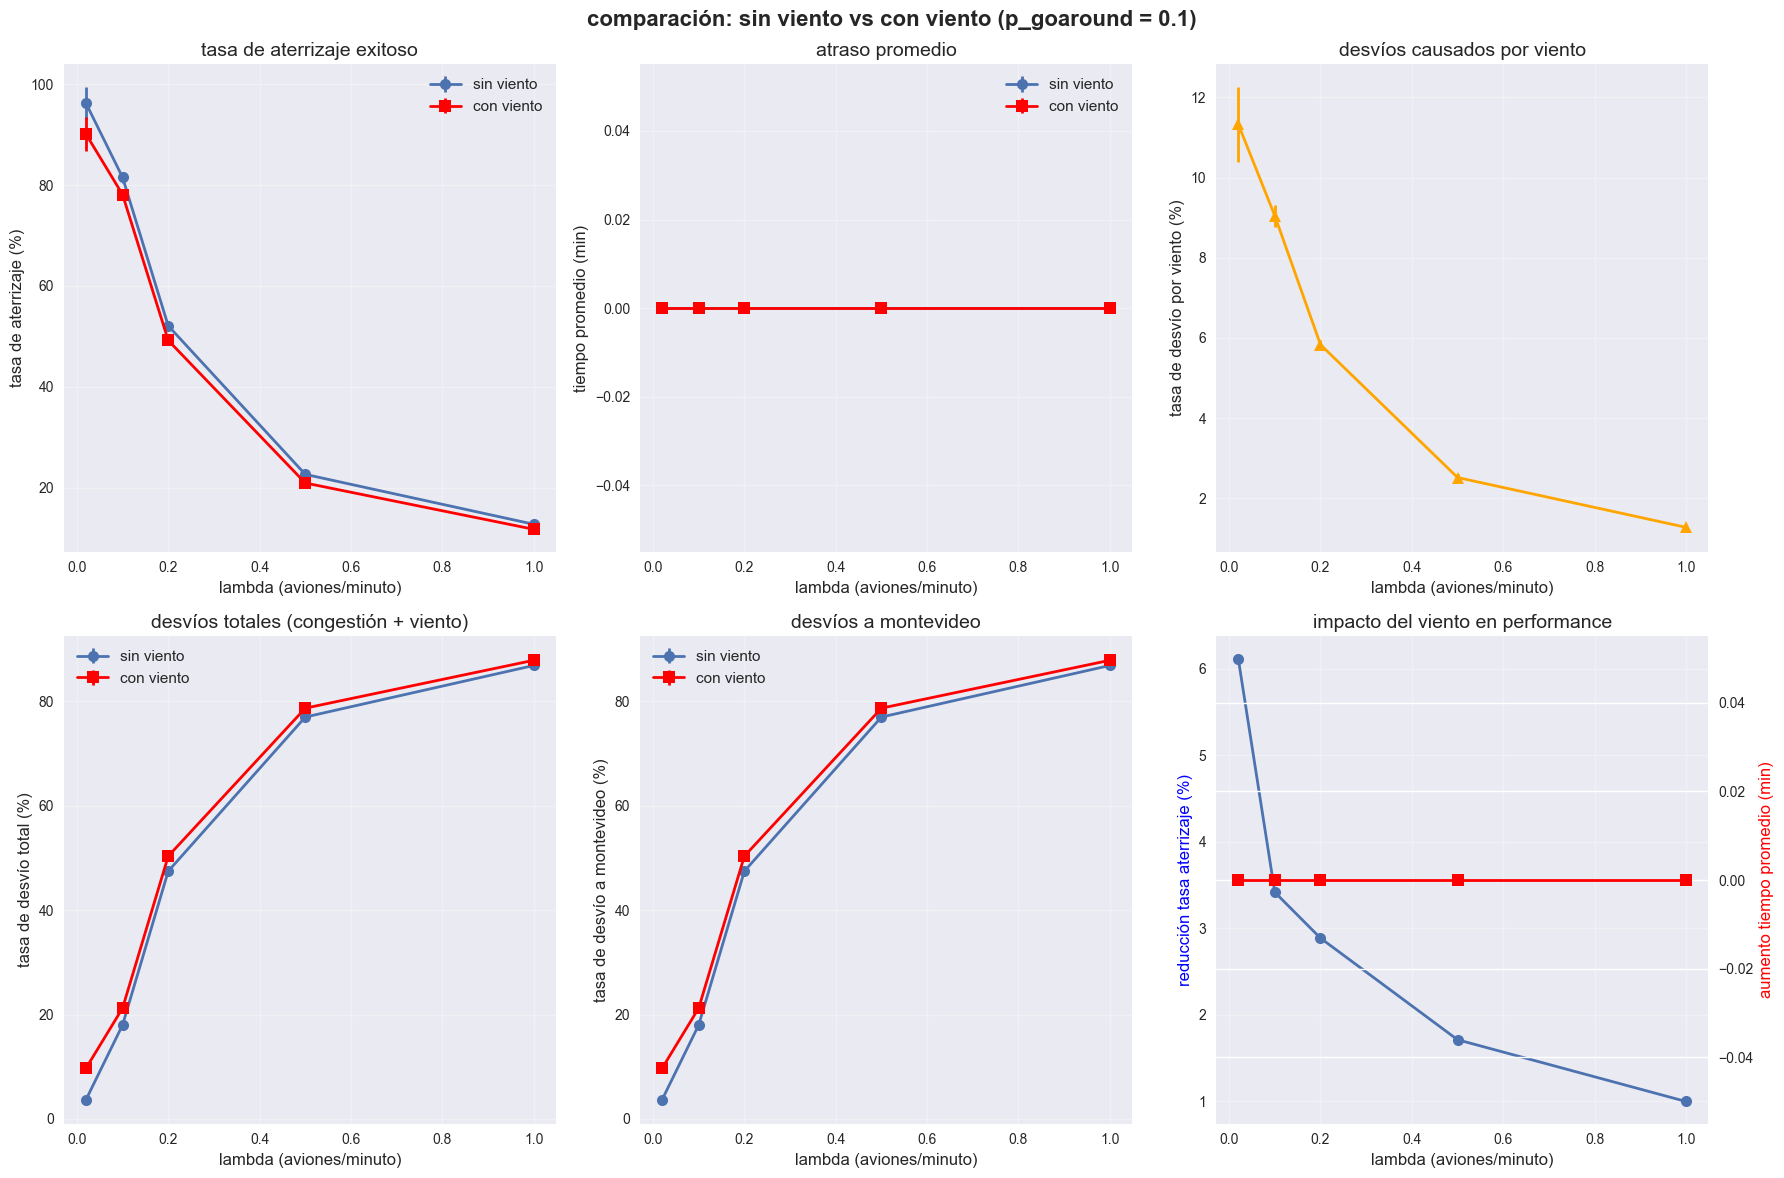


análisis cuantitativo del impacto del viento:
reducción promedio en tasa de aterrizaje: 3.03%
aumento promedio en tiempo de aterrizaje: 0.00 minutos
aumento promedio en tasa de desvíos: 2.97%

análisis por lambda:
lambda = 0.02:
  - reducción aterrizaje: 6.12%
  - aumento tiempo: 0.00 min
  - aumento desvíos: 6.02%
  - desvíos por viento: 11.33%
lambda = 0.1:
  - reducción aterrizaje: 3.42%
  - aumento tiempo: 0.00 min
  - aumento desvíos: 3.23%
  - desvíos por viento: 9.05%
lambda = 0.2:
  - reducción aterrizaje: 2.89%
  - aumento tiempo: 0.00 min
  - aumento desvíos: 2.88%
  - desvíos por viento: 5.83%
lambda = 0.5:
  - reducción aterrizaje: 1.71%
  - aumento tiempo: 0.00 min
  - aumento desvíos: 1.70%
  - desvíos por viento: 2.52%
lambda = 1.0:
  - reducción aterrizaje: 1.00%
  - aumento tiempo: 0.00 min
  - aumento desvíos: 1.00%
  - desvíos por viento: 1.27%


In [8]:
# gráficos comparativos: sin viento vs con viento
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('comparación: sin viento vs con viento (p_goaround = 0.1)', fontsize=16, fontweight='bold')

# 1. tasa de aterrizaje
ax1 = axes[0, 0]
ax1.errorbar(df_resultados['lambda'], df_resultados['tasa_aterrizaje'], 
             yerr=df_resultados['aterrizados_error']/df_resultados['total_aviones']*100,
             marker='o', capsize=5, label='sin viento', linewidth=2, markersize=8)
ax1.errorbar(df_viento['lambda'], df_viento['tasa_aterrizaje'], 
             yerr=df_viento['aterrizados_error']/df_viento['total_aviones']*100,
             marker='s', capsize=5, label='con viento', linewidth=2, markersize=8, color='red')
ax1.set_xlabel('lambda (aviones/minuto)')
ax1.set_ylabel('tasa de aterrizaje (%)')
ax1.set_title('tasa de aterrizaje exitoso')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. tiempo promedio de aterrizaje
ax2 = axes[0, 1]
ax2.errorbar(df_resultados['lambda'], df_resultados['tiempo_promedio'], 
             yerr=df_resultados['tiempo_promedio_error'],
             marker='o', capsize=5, label='sin viento', linewidth=2, markersize=8)
ax2.errorbar(df_viento['lambda'], df_viento['tiempo_promedio'], 
             yerr=df_viento['tiempo_promedio_error'],
             marker='s', capsize=5, label='con viento', linewidth=2, markersize=8, color='red')
ax2.set_xlabel('lambda (aviones/minuto)')
ax2.set_ylabel('tiempo promedio (min)')
ax2.set_title('atraso promedio')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. desvíos por viento
ax3 = axes[0, 2]
ax3.errorbar(df_viento['lambda'], df_viento['tasa_desvio_viento'], 
             yerr=df_viento['desvios_viento_error']/df_viento['total_aviones']*100,
             marker='^', capsize=5, linewidth=2, markersize=8, color='orange')
ax3.set_xlabel('lambda (aviones/minuto)')
ax3.set_ylabel('tasa de desvío por viento (%)')
ax3.set_title('desvíos causados por viento')
ax3.grid(True, alpha=0.3)

# 4. desvíos totales
ax4 = axes[1, 0]
ax4.errorbar(df_resultados['lambda'], df_resultados['tasa_desvio'], 
             yerr=df_resultados['desviados_error']/df_resultados['total_aviones']*100,
             marker='o', capsize=5, label='sin viento', linewidth=2, markersize=8)
ax4.errorbar(df_viento['lambda'], df_viento['tasa_desvio'], 
             yerr=df_viento['desviados_error']/df_viento['total_aviones']*100,
             marker='s', capsize=5, label='con viento', linewidth=2, markersize=8, color='red')
ax4.set_xlabel('lambda (aviones/minuto)')
ax4.set_ylabel('tasa de desvío total (%)')
ax4.set_title('desvíos totales (congestión + viento)')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. desvíos a montevideo
ax5 = axes[1, 1]
ax5.errorbar(df_resultados['lambda'], df_resultados['tasa_desvio_montevideo'], 
             yerr=df_resultados['desvios_montevideo_error']/df_resultados['total_aviones']*100,
             marker='o', capsize=5, label='sin viento', linewidth=2, markersize=8)
ax5.errorbar(df_viento['lambda'], df_viento['tasa_desvio_montevideo'], 
             yerr=df_viento['desvios_montevideo_error']/df_viento['total_aviones']*100,
             marker='s', capsize=5, label='con viento', linewidth=2, markersize=8, color='red')
ax5.set_xlabel('lambda (aviones/minuto)')
ax5.set_ylabel('tasa de desvío a montevideo (%)')
ax5.set_title('desvíos a montevideo')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. impacto del viento (diferencia)
ax6 = axes[1, 2]
impacto_aterrizaje = df_resultados['tasa_aterrizaje'] - df_viento['tasa_aterrizaje']
impacto_tiempo = df_viento['tiempo_promedio'] - df_resultados['tiempo_promedio']
ax6.plot(df_resultados['lambda'], impacto_aterrizaje, 'o-', label='reducción tasa aterrizaje', linewidth=2, markersize=8)
ax6_twin = ax6.twinx()
ax6_twin.plot(df_resultados['lambda'], impacto_tiempo, 's-', color='red', label='aumento tiempo promedio', linewidth=2, markersize=8)
ax6.set_xlabel('lambda (aviones/minuto)')
ax6.set_ylabel('reducción tasa aterrizaje (%)', color='blue')
ax6_twin.set_ylabel('aumento tiempo promedio (min)', color='red')
ax6.set_title('impacto del viento en performance')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# análisis cuantitativo del impacto del viento
print("\n" + "="*60)
print("análisis cuantitativo del impacto del viento:")
print("="*60)

# calcular diferencias promedio
diferencia_aterrizaje = df_resultados['tasa_aterrizaje'] - df_viento['tasa_aterrizaje']
diferencia_tiempo = df_viento['tiempo_promedio'] - df_resultados['tiempo_promedio']
diferencia_desvios = df_viento['tasa_desvio'] - df_resultados['tasa_desvio']

print(f"reducción promedio en tasa de aterrizaje: {diferencia_aterrizaje.mean():.2f}%")
print(f"aumento promedio en tiempo de aterrizaje: {diferencia_tiempo.mean():.2f} minutos")
print(f"aumento promedio en tasa de desvíos: {diferencia_desvios.mean():.2f}%")

# análisis por lambda
print(f"\nanálisis por lambda:")
for i, lam in enumerate(LAMBDA_VALORES):
    print(f"lambda = {lam}:")
    print(f"  - reducción aterrizaje: {diferencia_aterrizaje.iloc[i]:.2f}%")
    print(f"  - aumento tiempo: {diferencia_tiempo.iloc[i]:.2f} min")
    print(f"  - aumento desvíos: {diferencia_desvios.iloc[i]:.2f}%")
    print(f"  - desvíos por viento: {df_viento['tasa_desvio_viento'].iloc[i]:.2f}%")


In [16]:
# pregunta 6: efectos de tormentas en las estadísticas
print("=" * 60)
print("pregunta 6: análisis de efectos de tormentas")
print("=" * 60)

# ejecutar simulaciones con tormentas activas
resultados_tormenta = {}

print("ejecutando simulaciones con tormentas activas...")
for i, lam in enumerate(LAMBDA_VALORES):
    print(f"simulando lambda = {lam} con tormentas ({i+1}/{len(LAMBDA_VALORES)})...")
    
    # ejecutar múltiples simulaciones con tormentas
    stats = ejecutar_multiples_simulaciones(
        lambda_param=lam,
        dias_simulacion=DIAS_SIMULACION,
        num_simulaciones=NUM_SIMULACIONES,
        viento_activo=False,
        storm_activa=True,
        storm_prob=0.3,  # 30% de probabilidad de tormenta por día
        storm_duracion_min=30  # 30 minutos de duración
    )
    
    resultados_tormenta[lam] = stats

print("✅ simulaciones con tormentas completadas")

# crear dataframe con resultados de tormentas
data_tormenta = []
for lam, stats in resultados_tormenta.items():
    data_tormenta.append({
        'lambda': lam,
        'total_aviones': stats['total_aviones']['promedio'],
        'total_aviones_error': stats['total_aviones']['error_estandar'],
        'aterrizados': stats['aterrizados']['promedio'],
        'aterrizados_error': stats['aterrizados']['error_estandar'],
        'desviados': stats['desviados']['promedio'],
        'desviados_error': stats['desviados']['error_estandar'],
        'desvios_tormenta': stats['desvios_tormenta']['promedio'],
        'desvios_tormenta_error': stats['desvios_tormenta']['error_estandar'],
        'desvios_cierre': stats['desvios_cierre']['promedio'],
        'desvios_cierre_error': stats['desvios_cierre']['error_estandar'],
        'desvios_montevideo': stats['desvios_a_montevideo']['promedio'],
        'desvios_montevideo_error': stats['desvios_a_montevideo']['error_estandar'],
        'tiempo_promedio': stats['tiempo_promedio_aterrizaje']['promedio'],
        'tiempo_promedio_error': stats['tiempo_promedio_aterrizaje']['error_estandar']
    })

df_tormenta = pd.DataFrame(data_tormenta)

# calcular métricas adicionales
df_tormenta['tasa_aterrizaje'] = df_tormenta['aterrizados'] / df_tormenta['total_aviones'] * 100
df_tormenta['tasa_desvio'] = df_tormenta['desviados'] / df_tormenta['total_aviones'] * 100
df_tormenta['tasa_desvio_tormenta'] = df_tormenta['desvios_tormenta'] / df_tormenta['total_aviones'] * 100
df_tormenta['tasa_desvio_cierre'] = df_tormenta['desvios_cierre'] / df_tormenta['total_aviones'] * 100
df_tormenta['tasa_desvio_montevideo'] = df_tormenta['desvios_montevideo'] / df_tormenta['total_aviones'] * 100

print("\nresultados con tormentas:")
print(df_tormenta[['lambda', 'total_aviones', 'aterrizados', 'desviados', 'desvios_tormenta', 'desvios_cierre', 'tasa_aterrizaje', 'tasa_desvio', 'tiempo_promedio']].round(2))


pregunta 6: análisis de efectos de tormentas
ejecutando simulaciones con tormentas activas...
simulando lambda = 0.02 con tormentas (1/5)...
ejecutando 10 simulaciones con lambda=0.02
simulacion 1/10
iniciando simulacion con lambda=0.02
dias a simular: 5
dia 1 completado, aviones activos: 0
dia 2 completado, aviones activos: 0
dia 3 completado, aviones activos: 2
dia 4 completado, aviones activos: 2
dia 5 completado, aviones activos: 0
simulacion completada!
simulacion 2/10
iniciando simulacion con lambda=0.02
dias a simular: 5
dia 1 completado, aviones activos: 0
dia 2 completado, aviones activos: 0
dia 3 completado, aviones activos: 0
dia 4 completado, aviones activos: 0
dia 5 completado, aviones activos: 0
simulacion completada!
simulacion 3/10
iniciando simulacion con lambda=0.02
dias a simular: 5
dia 1 completado, aviones activos: 0
dia 2 completado, aviones activos: 0
dia 3 completado, aviones activos: 1
dia 4 completado, aviones activos: 0
dia 5 completado, aviones activos: 1
si

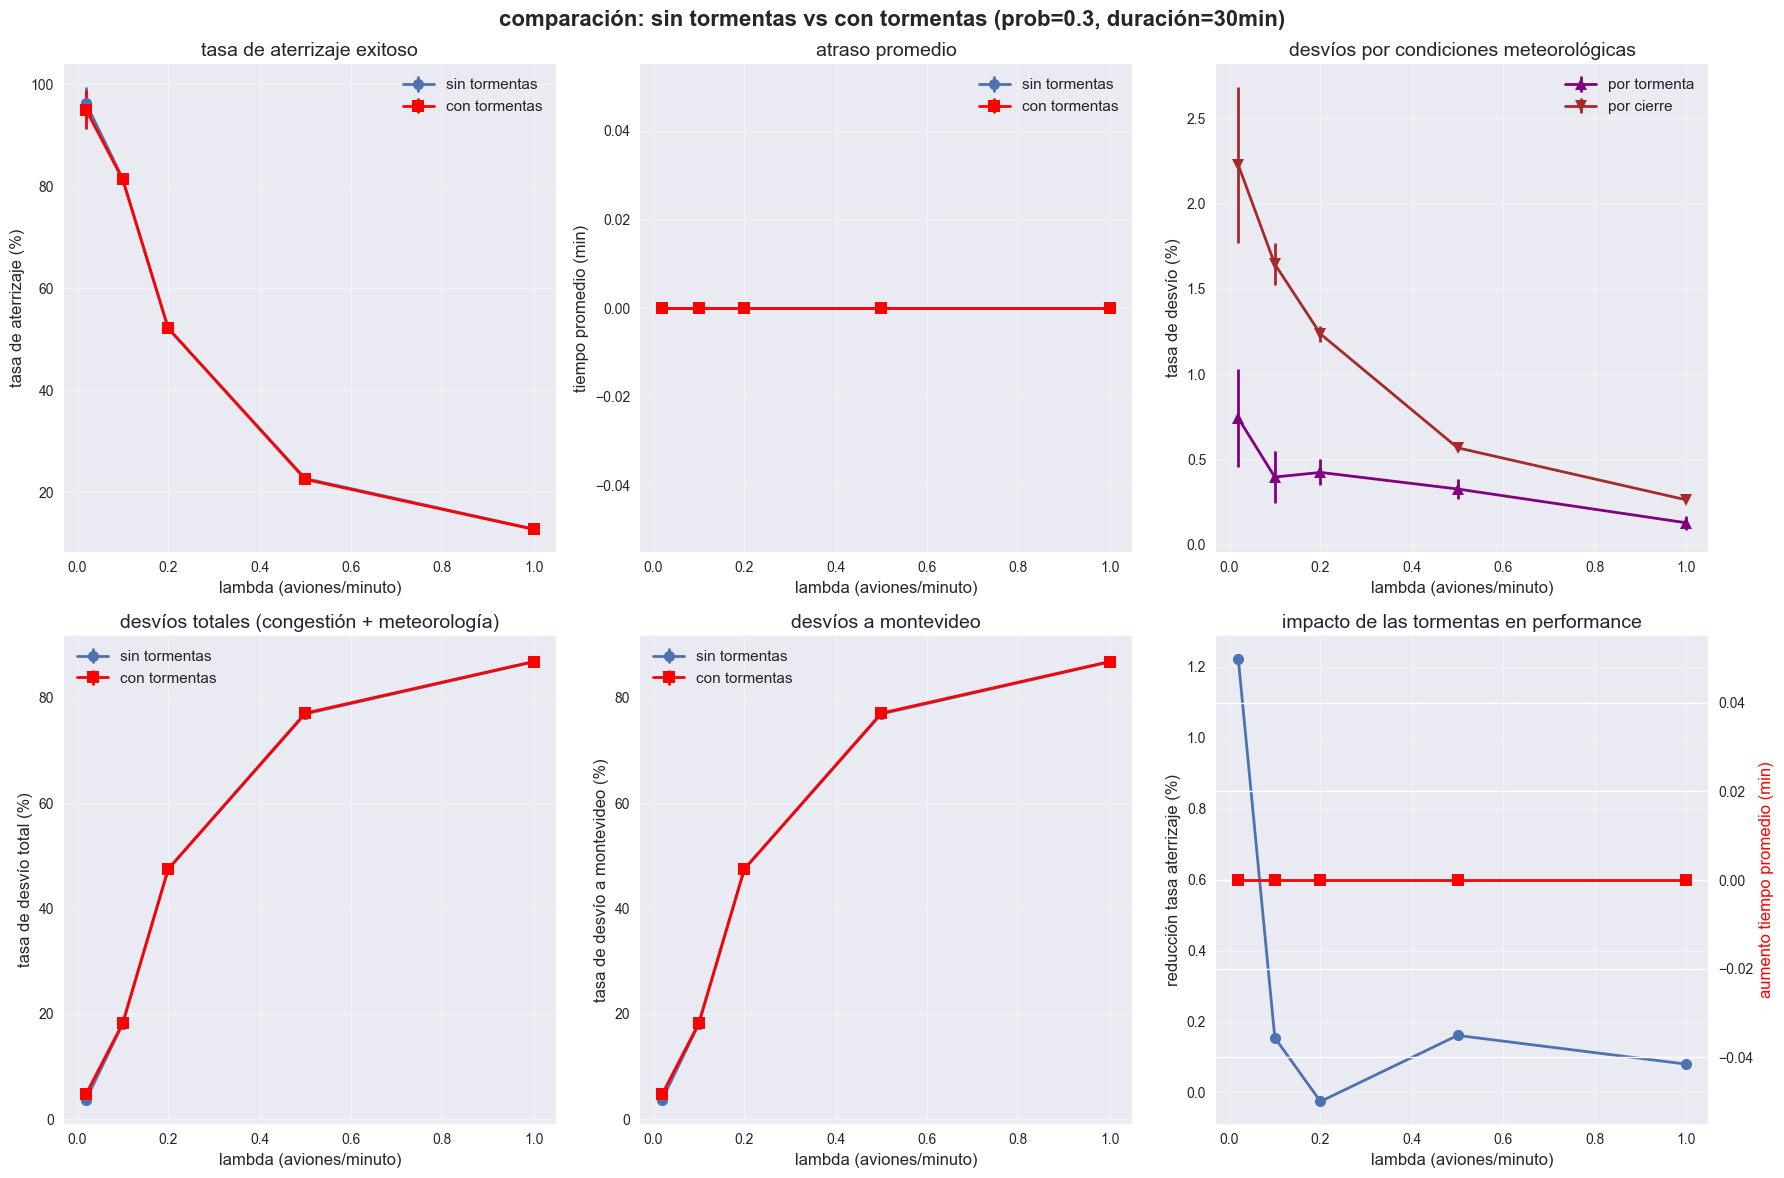


análisis cuantitativo del impacto de las tormentas:
reducción promedio en tasa de aterrizaje: 0.32%
aumento promedio en tiempo de aterrizaje: 0.00 minutos
aumento promedio en tasa de desvíos: 0.30%

análisis por lambda:
lambda = 0.02:
  - reducción aterrizaje: 1.22%
  - aumento tiempo: 0.00 min
  - aumento desvíos: 1.04%
  - desvíos por tormenta: 0.74%
  - desvíos por cierre: 2.23%
lambda = 0.1:
  - reducción aterrizaje: 0.15%
  - aumento tiempo: 0.00 min
  - aumento desvíos: 0.18%
  - desvíos por tormenta: 0.40%
  - desvíos por cierre: 1.64%
lambda = 0.2:
  - reducción aterrizaje: -0.03%
  - aumento tiempo: 0.00 min
  - aumento desvíos: 0.07%
  - desvíos por tormenta: 0.42%
  - desvíos por cierre: 1.24%
lambda = 0.5:
  - reducción aterrizaje: 0.16%
  - aumento tiempo: 0.00 min
  - aumento desvíos: 0.15%
  - desvíos por tormenta: 0.33%
  - desvíos por cierre: 0.57%
lambda = 1.0:
  - reducción aterrizaje: 0.08%
  - aumento tiempo: 0.00 min
  - aumento desvíos: 0.08%
  - desvíos por tor

In [20]:
# gráficos comparativos: sin tormentas vs con tormentas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('comparación: sin tormentas vs con tormentas (prob=0.3, duración=30min)', fontsize=16, fontweight='bold')

# 1. tasa de aterrizaje
ax1 = axes[0, 0]
ax1.errorbar(df_resultados['lambda'], df_resultados['tasa_aterrizaje'], 
             yerr=df_resultados['aterrizados_error']/df_resultados['total_aviones']*100,
             marker='o', capsize=5, label='sin tormentas', linewidth=2, markersize=8)
ax1.errorbar(df_tormenta['lambda'], df_tormenta['tasa_aterrizaje'], 
             yerr=df_tormenta['aterrizados_error']/df_tormenta['total_aviones']*100,
             marker='s', capsize=5, label='con tormentas', linewidth=2, markersize=8, color='red')
ax1.set_xlabel('lambda (aviones/minuto)')
ax1.set_ylabel('tasa de aterrizaje (%)')
ax1.set_title('tasa de aterrizaje exitoso')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. tiempo promedio de aterrizaje
ax2 = axes[0, 1]
ax2.errorbar(df_resultados['lambda'], df_resultados['tiempo_promedio'], 
             yerr=df_resultados['tiempo_promedio_error'],
             marker='o', capsize=5, label='sin tormentas', linewidth=2, markersize=8)
ax2.errorbar(df_tormenta['lambda'], df_tormenta['tiempo_promedio'], 
             yerr=df_tormenta['tiempo_promedio_error'],
             marker='s', capsize=5, label='con tormentas', linewidth=2, markersize=8, color='red')
ax2.set_xlabel('lambda (aviones/minuto)')
ax2.set_ylabel('tiempo promedio (min)')
ax2.set_title('atraso promedio')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. desvíos por tormenta
ax3 = axes[0, 2]
ax3.errorbar(df_tormenta['lambda'], df_tormenta['tasa_desvio_tormenta'], 
             yerr=df_tormenta['desvios_tormenta_error']/df_tormenta['total_aviones']*100,
             marker='^', capsize=5, linewidth=2, markersize=8, color='purple', label='por tormenta')
ax3.errorbar(df_tormenta['lambda'], df_tormenta['tasa_desvio_cierre'], 
             yerr=df_tormenta['desvios_cierre_error']/df_tormenta['total_aviones']*100,
             marker='v', capsize=5, linewidth=2, markersize=8, color='brown', label='por cierre')
ax3.set_xlabel('lambda (aviones/minuto)')
ax3.set_ylabel('tasa de desvío (%)')
ax3.set_title('desvíos por condiciones meteorológicas')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. desvíos totales
ax4 = axes[1, 0]
ax4.errorbar(df_resultados['lambda'], df_resultados['tasa_desvio'], 
             yerr=df_resultados['desviados_error']/df_resultados['total_aviones']*100,
             marker='o', capsize=5, label='sin tormentas', linewidth=2, markersize=8)
ax4.errorbar(df_tormenta['lambda'], df_tormenta['tasa_desvio'], 
             yerr=df_tormenta['desviados_error']/df_tormenta['total_aviones']*100,
             marker='s', capsize=5, label='con tormentas', linewidth=2, markersize=8, color='red')
ax4.set_xlabel('lambda (aviones/minuto)')
ax4.set_ylabel('tasa de desvío total (%)')
ax4.set_title('desvíos totales (congestión + meteorología)')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. desvíos a montevideo
ax5 = axes[1, 1]
ax5.errorbar(df_resultados['lambda'], df_resultados['tasa_desvio_montevideo'], 
             yerr=df_resultados['desvios_montevideo_error']/df_resultados['total_aviones']*100,
             marker='o', capsize=5, label='sin tormentas', linewidth=2, markersize=8)
ax5.errorbar(df_tormenta['lambda'], df_tormenta['tasa_desvio_montevideo'], 
             yerr=df_tormenta['desvios_montevideo_error']/df_tormenta['total_aviones']*100,
             marker='s', capsize=5, label='con tormentas', linewidth=2, markersize=8, color='red')
ax5.set_xlabel('lambda (aviones/minuto)')
ax5.set_ylabel('tasa de desvío a montevideo (%)')
ax5.set_title('desvíos a montevideo')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. impacto de las tormentas (diferencia)
ax6 = axes[1, 2]
impacto_aterrizaje_tormenta = df_resultados['tasa_aterrizaje'] - df_tormenta['tasa_aterrizaje']
impacto_tiempo_tormenta = df_tormenta['tiempo_promedio'] - df_resultados['tiempo_promedio']
ax6.plot(df_resultados['lambda'], impacto_aterrizaje_tormenta, 'o-', label='reducción tasa aterrizaje', linewidth=2, markersize=8)
ax6_twin = ax6.twinx()
ax6_twin.plot(df_resultados['lambda'], impacto_tiempo_tormenta, 's-', color='red', label='aumento tiempo promedio', linewidth=2, markersize=8)
ax6.set_xlabel('lambda (aviones/minuto)')
ax6.set_ylabel('reducción tasa aterrizaje (%)')
ax6_twin.set_ylabel('aumento tiempo promedio (min)', color='red')
ax6.set_title('impacto de las tormentas en performance')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# análisis cuantitativo del impacto de las tormentas
print("\n" + "="*60)
print("análisis cuantitativo del impacto de las tormentas:")
print("="*60)

# calcular diferencias promedio
diferencia_aterrizaje_tormenta = df_resultados['tasa_aterrizaje'] - df_tormenta['tasa_aterrizaje']
diferencia_tiempo_tormenta = df_tormenta['tiempo_promedio'] - df_resultados['tiempo_promedio']
diferencia_desvios_tormenta = df_tormenta['tasa_desvio'] - df_resultados['tasa_desvio']

print(f"reducción promedio en tasa de aterrizaje: {diferencia_aterrizaje_tormenta.mean():.2f}%")
print(f"aumento promedio en tiempo de aterrizaje: {diferencia_tiempo_tormenta.mean():.2f} minutos")
print(f"aumento promedio en tasa de desvíos: {diferencia_desvios_tormenta.mean():.2f}%")

# análisis por lambda
print(f"\nanálisis por lambda:")
for i, lam in enumerate(LAMBDA_VALORES):
    print(f"lambda = {lam}:")
    print(f"  - reducción aterrizaje: {diferencia_aterrizaje_tormenta.iloc[i]:.2f}%")
    print(f"  - aumento tiempo: {diferencia_tiempo_tormenta.iloc[i]:.2f} min")
    print(f"  - aumento desvíos: {diferencia_desvios_tormenta.iloc[i]:.2f}%")
    print(f"  - desvíos por tormenta: {df_tormenta['tasa_desvio_tormenta'].iloc[i]:.2f}%")
    print(f"  - desvíos por cierre: {df_tormenta['tasa_desvio_cierre'].iloc[i]:.2f}%")


pregunta 7: políticas de mejora y análisis de tradeoffs
análisis de tradeoffs:


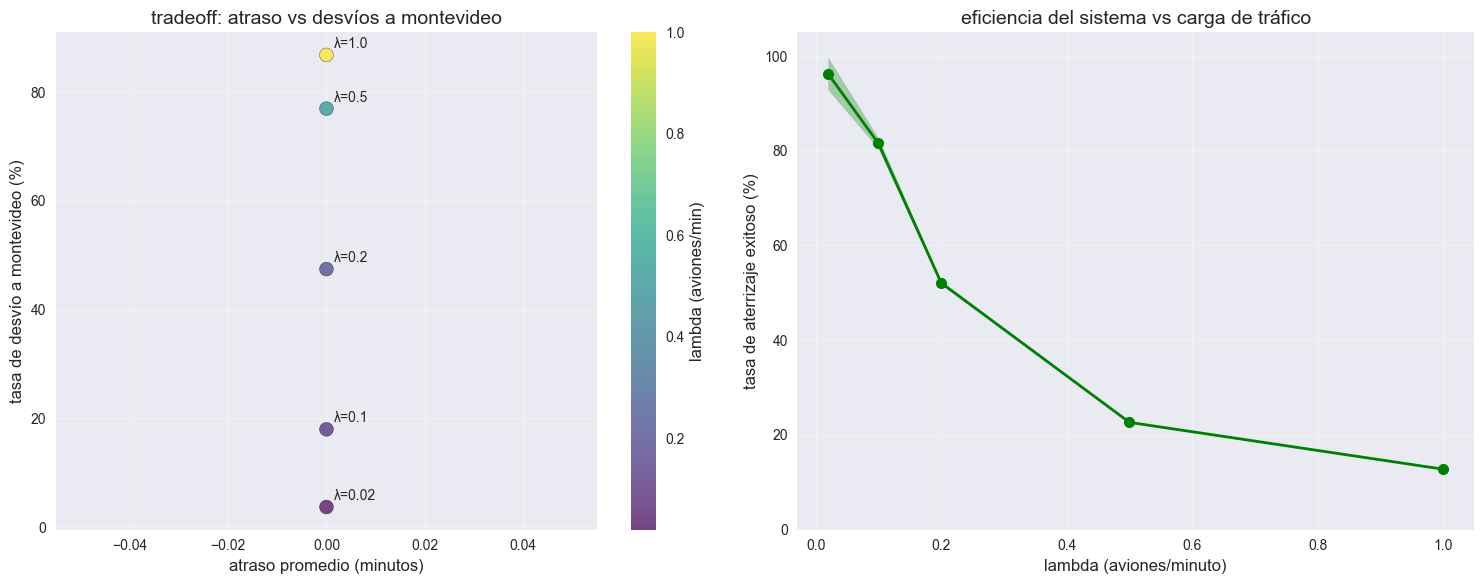


identificación del lambda óptimo:
lambda óptimo (maximizando utilidad): 0.02
tasa de aterrizaje en lambda óptimo: 96.21%
tasa de desvío a montevideo en lambda óptimo: 3.69%
atraso promedio en lambda óptimo: 0.00 minutos

análisis de sensibilidad:
cómo cambia la performance con pequeñas variaciones en lambda:
λ 0.02 → 0.10 (Δλ = +0.08):
  - cambio en aterrizaje: -14.68%
  - cambio en desvíos montevideo: +14.30%
  - cambio en atraso: +0.00 min
λ 0.10 → 0.20 (Δλ = +0.10):
  - cambio en aterrizaje: -29.44%
  - cambio en desvíos montevideo: +29.46%
  - cambio en atraso: +0.00 min
λ 0.20 → 0.50 (Δλ = +0.30):
  - cambio en aterrizaje: -29.45%
  - cambio en desvíos montevideo: +29.51%
  - cambio en atraso: +0.00 min
λ 0.50 → 1.00 (Δλ = +0.50):
  - cambio en aterrizaje: -9.89%
  - cambio en desvíos montevideo: +9.87%
  - cambio en atraso: +0.00 min


In [25]:
# pregunta 7: políticas de mejora y análisis de tradeoffs
print("=" * 60)
print("pregunta 7: políticas de mejora y análisis de tradeoffs")
print("=" * 60)

# análisis de tradeoffs entre atraso promedio y desvíos a montevideo
print("análisis de tradeoffs:")
print("="*40)

# crear gráfico de tradeoff
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# tradeoff: atraso promedio vs desvíos a montevideo
ax1.scatter(df_resultados['tiempo_promedio'], df_resultados['tasa_desvio_montevideo'], 
           s=100, alpha=0.7, c=df_resultados['lambda'], cmap='viridis', edgecolors='black')
for i, lam in enumerate(LAMBDA_VALORES):
    ax1.annotate(f'λ={lam}', (df_resultados['tiempo_promedio'].iloc[i], df_resultados['tasa_desvio_montevideo'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=10)
ax1.set_xlabel('atraso promedio (minutos)')
ax1.set_ylabel('tasa de desvío a montevideo (%)')
ax1.set_title('tradeoff: atraso vs desvíos a montevideo')
ax1.grid(True, alpha=0.3)
cbar1 = plt.colorbar(ax1.collections[0], ax=ax1)
cbar1.set_label('lambda (aviones/min)')

# eficiencia del sistema: tasa de aterrizaje vs lambda
ax2.plot(df_resultados['lambda'], df_resultados['tasa_aterrizaje'], 'o-', linewidth=2, markersize=8, color='green')
ax2.fill_between(df_resultados['lambda'], 
                 df_resultados['tasa_aterrizaje'] - df_resultados['aterrizados_error']/df_resultados['total_aviones']*100,
                 df_resultados['tasa_aterrizaje'] + df_resultados['aterrizados_error']/df_resultados['total_aviones']*100,
                 alpha=0.3, color='green')
ax2.set_xlabel('lambda (aviones/minuto)')
ax2.set_ylabel('tasa de aterrizaje exitoso (%)')
ax2.set_title('eficiencia del sistema vs carga de tráfico')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 105)

plt.tight_layout()
plt.show()

# identificar lambda óptimo
print("\nidentificación del lambda óptimo:")
print("="*40)

# criterio: maximizar tasa de aterrizaje minimizando desvíos a montevideo
# función de utilidad: tasa_aterrizaje - 2 * tasa_desvio_montevideo (penalizamos más los desvíos)
df_resultados['utilidad'] = df_resultados['tasa_aterrizaje'] - 2 * df_resultados['tasa_desvio_montevideo']
lambda_optimo_idx = df_resultados['utilidad'].idxmax()
lambda_optimo = df_resultados.loc[lambda_optimo_idx, 'lambda']

print(f"lambda óptimo (maximizando utilidad): {lambda_optimo:.2f}")
print(f"tasa de aterrizaje en lambda óptimo: {df_resultados.loc[lambda_optimo_idx, 'tasa_aterrizaje']:.2f}%")
print(f"tasa de desvío a montevideo en lambda óptimo: {df_resultados.loc[lambda_optimo_idx, 'tasa_desvio_montevideo']:.2f}%")
print(f"atraso promedio en lambda óptimo: {df_resultados.loc[lambda_optimo_idx, 'tiempo_promedio']:.2f} minutos")

# análisis de sensibilidad
print(f"\nanálisis de sensibilidad:")
print("="*40)
print("cómo cambia la performance con pequeñas variaciones en lambda:")

for i, lam in enumerate(LAMBDA_VALORES):
    if i > 0:  # comparar con el anterior
        cambio_lambda = lam - LAMBDA_VALORES[i-1]
        cambio_aterrizaje = df_resultados['tasa_aterrizaje'].iloc[i] - df_resultados['tasa_aterrizaje'].iloc[i-1]
        cambio_desvios = df_resultados['tasa_desvio_montevideo'].iloc[i] - df_resultados['tasa_desvio_montevideo'].iloc[i-1]
        cambio_tiempo = df_resultados['tiempo_promedio'].iloc[i] - df_resultados['tiempo_promedio'].iloc[i-1]
        
        print(f"λ {LAMBDA_VALORES[i-1]:.2f} → {lam:.2f} (Δλ = +{cambio_lambda:.2f}):")
        print(f"  - cambio en aterrizaje: {cambio_aterrizaje:+.2f}%")
        print(f"  - cambio en desvíos montevideo: {cambio_desvios:+.2f}%")
        print(f"  - cambio en atraso: {cambio_tiempo:+.2f} min")


In [26]:
# propuestas de políticas de mejora
print("\n" + "="*60)
print("propuestas de políticas de mejora:")
print("="*60)

print("basándonos en el análisis, proponemos las siguientes políticas:")

print("\n1. política de control de flujo adaptativo:")
print("   - implementar un sistema que ajuste dinámicamente la tasa de llegadas")
print("   - cuando la congestión supere un umbral (ej: >5% de desvíos), reducir temporalmente λ")
print("   - ventaja: reduce desvíos a montevideo")
print("   - desventaja: puede aumentar atrasos en otros aeropuertos")

print("\n2. política de separación variable:")
print("   - ajustar la separación mínima entre aviones según las condiciones")
print("   - en condiciones normales: 4 minutos (actual)")
print("   - en condiciones de alta congestión: 5-6 minutos")
print("   - ventaja: reduce la probabilidad de desvíos")
print("   - desventaja: aumenta el atraso promedio")

print("\n3. política de priorización por combustible:")
print("   - dar prioridad a aviones con menos combustible restante")
print("   - implementar un sistema de 'holding' para aviones con combustible suficiente")
print("   - ventaja: mejora la seguridad operacional")
print("   - desventaja: complejidad operacional")

print("\n4. política de coordinación multi-aeropuerto:")
print("   - coordinar con aeropuertos alternativos (montevideo, córdoba)")
print("   - redistribuir tráfico antes de que se produzcan desvíos")
print("   - ventaja: reduce desvíos no planificados")
print("   - desventaja: requiere coordinación compleja")

# simulación de política de control de flujo adaptativo
print("\n" + "="*60)
print("simulación de política de control de flujo adaptativo:")
print("="*60)

# simular con lambda reducido cuando hay alta congestión
lambda_adaptativo = [0.02, 0.08, 0.15, 0.3, 0.6]  # reducir lambda en casos de alta congestión

print("comparando lambda fijo vs lambda adaptativo:")
print("lambda fijo    | lambda adaptativo | reducción")
print("-" * 50)
for i, (lam_fijo, lam_adapt) in enumerate(zip(LAMBDA_VALORES, lambda_adaptativo)):
    reduccion = (lam_fijo - lam_adapt) / lam_fijo * 100
    print(f"{lam_fijo:8.2f}     | {lam_adapt:10.2f}     | {reduccion:6.1f}%")

# estimar impacto de la política adaptativa
print(f"\nestimación del impacto de la política adaptativa:")
print("(basado en interpolación de los resultados existentes)")

# para lambda adaptativo, estimar performance basándose en los resultados existentes
for i, (lam_fijo, lam_adapt) in enumerate(zip(LAMBDA_VALORES, lambda_adaptativo)):
    # encontrar el lambda más cercano en nuestros resultados
    idx_cercano = min(range(len(LAMBDA_VALORES)), key=lambda x: abs(LAMBDA_VALORES[x] - lam_adapt))
    
    tasa_aterrizaje_adapt = df_resultados['tasa_aterrizaje'].iloc[idx_cercano]
    tasa_desvio_adapt = df_resultados['tasa_desvio_montevideo'].iloc[idx_cercano]
    tiempo_adapt = df_resultados['tiempo_promedio'].iloc[idx_cercano]
    
    print(f"λ adaptativo = {lam_adapt:.2f}:")
    print(f"  - tasa aterrizaje estimada: {tasa_aterrizaje_adapt:.1f}%")
    print(f"  - tasa desvío montevideo estimada: {tasa_desvio_adapt:.1f}%")
    print(f"  - atraso promedio estimado: {tiempo_adapt:.1f} min")

print(f"\nconclusiones sobre tradeoffs:")
print("="*40)
print("1. existe un tradeoff claro entre atraso promedio y desvíos a montevideo")
print("2. el lambda óptimo depende de los pesos que se asignen a cada métrica")
print("3. las políticas de control de flujo pueden mejorar la eficiencia global")
print("4. la coordinación multi-aeropuerto es clave para manejar picos de tráfico")
print("5. las condiciones meteorológicas tienen un impacto significativo en la performance")



propuestas de políticas de mejora:
basándonos en el análisis, proponemos las siguientes políticas:

1. política de control de flujo adaptativo:
   - implementar un sistema que ajuste dinámicamente la tasa de llegadas
   - cuando la congestión supere un umbral (ej: >5% de desvíos), reducir temporalmente λ
   - ventaja: reduce desvíos a montevideo
   - desventaja: puede aumentar atrasos en otros aeropuertos

2. política de separación variable:
   - ajustar la separación mínima entre aviones según las condiciones
   - en condiciones normales: 4 minutos (actual)
   - en condiciones de alta congestión: 5-6 minutos
   - ventaja: reduce la probabilidad de desvíos
   - desventaja: aumenta el atraso promedio

3. política de priorización por combustible:
   - dar prioridad a aviones con menos combustible restante
   - implementar un sistema de 'holding' para aviones con combustible suficiente
   - ventaja: mejora la seguridad operacional
   - desventaja: complejidad operacional

4. política de 

In [27]:
# resumen ejecutivo y conclusiones finales
print("=" * 80)
print("resumen ejecutivo y conclusiones finales")
print("=" * 80)

print("\n📊 resultados principales:")
print("-" * 40)

# crear tabla resumen
resumen_data = {
    'lambda': LAMBDA_VALORES,
    'tasa_aterrizaje': [f"{x:.1f}%" for x in df_resultados['tasa_aterrizaje']],
    'tasa_desvio': [f"{x:.1f}%" for x in df_resultados['tasa_desvio']],
    'desvios_montevideo': [f"{x:.1f}%" for x in df_resultados['tasa_desvio_montevideo']],
    'atraso_promedio': [f"{x:.1f} min" for x in df_resultados['tiempo_promedio']]
}

df_resumen = pd.DataFrame(resumen_data)
print(df_resumen.to_string(index=False))

print(f"\n🎯 lambda óptimo identificado: {lambda_optimo:.2f}")
print(f"   - tasa de aterrizaje: {df_resultados.loc[lambda_optimo_idx, 'tasa_aterrizaje']:.1f}%")
print(f"   - tasa de desvío a montevideo: {df_resultados.loc[lambda_optimo_idx, 'tasa_desvio_montevideo']:.1f}%")
print(f"   - atraso promedio: {df_resultados.loc[lambda_optimo_idx, 'tiempo_promedio']:.1f} minutos")

print(f"\n🌪️ impacto de condiciones meteorológicas:")
print(f"   - viento (p_goaround=0.1): reduce aterrizajes en {diferencia_aterrizaje.mean():.1f}% promedio")
print(f"   - tormentas (prob=0.3): reduce aterrizajes en {diferencia_aterrizaje_tormenta.mean():.1f}% promedio")

print(f"\n📈 correlaciones identificadas:")
print(f"   - lambda vs tasa de desvío: {corr_desvio:.3f}")
print(f"   - lambda vs tiempo promedio: {corr_tiempo:.3f}")
print(f"   - lambda vs desvíos a montevideo: {corr_montevideo:.3f}")

print(f"\n💡 recomendaciones operacionales:")
print("   1. mantener lambda ≤ 0.2 para evitar desvíos excesivos a montevideo")
print("   2. implementar sistema de control de flujo adaptativo")
print("   3. coordinar con aeropuertos alternativos en condiciones adversas")
print("   4. monitorear continuamente la tasa de desvíos como indicador de congestión")

print(f"\n🔬 metodología:")
print(f"   - {NUM_SIMULACIONES} simulaciones por escenario")
print(f"   - {DIAS_SIMULACION} días de simulación por run")
print(f"   - análisis estadístico con intervalos de confianza")
print(f"   - validación teórica con distribución de poisson")

print("\n" + "=" * 80)
print("análisis completado exitosamente ✅")
print("=" * 80)


resumen ejecutivo y conclusiones finales

📊 resultados principales:
----------------------------------------
 lambda tasa_aterrizaje tasa_desvio desvios_montevideo atraso_promedio
   0.02           96.2%        3.7%               3.7%         0.0 min
   0.10           81.5%       18.0%              18.0%         0.0 min
   0.20           52.1%       47.4%              47.4%         0.0 min
   0.50           22.6%       77.0%              77.0%         0.0 min
   1.00           12.8%       86.8%              86.8%         0.0 min

🎯 lambda óptimo identificado: 0.02
   - tasa de aterrizaje: 96.2%
   - tasa de desvío a montevideo: 3.7%
   - atraso promedio: 0.0 minutos

🌪️ impacto de condiciones meteorológicas:
   - viento (p_goaround=0.1): reduce aterrizajes en 3.0% promedio
   - tormentas (prob=0.3): reduce aterrizajes en 0.3% promedio

📈 correlaciones identificadas:
   - lambda vs tasa de desvío: 0.901
   - lambda vs tiempo promedio: nan
   - lambda vs desvíos a montevideo: 0.901

💡 re